1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

**Submission Link**: https://forms.gle/M2CxqVGrKLTzqR7g9 (Submit your .ipynb file)

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

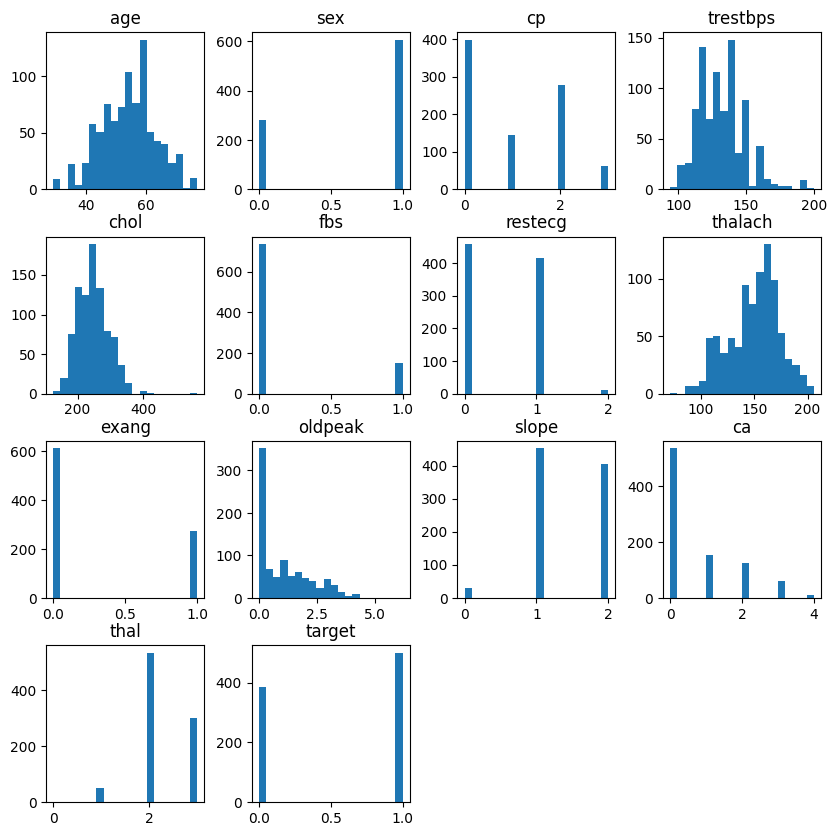

In [320]:
import pandas as pd
PATH = "heart.csv" # Path to your file

df = pd.read_csv(PATH)
#ToDo: Show histogram of dataframe
display(df.head())
df.hist(figsize=(10, 10), bins=20, grid=False)

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


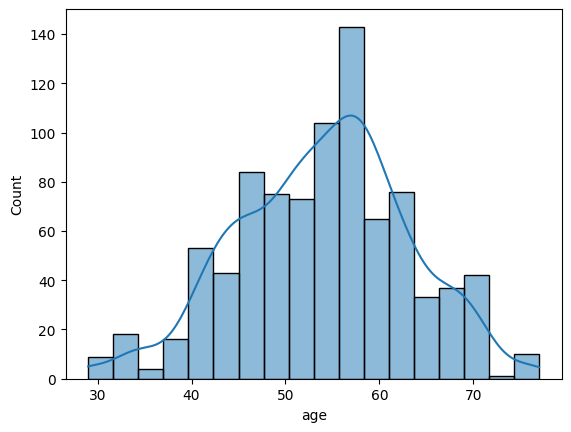

In [322]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x="age", kde=True)
plt.show()

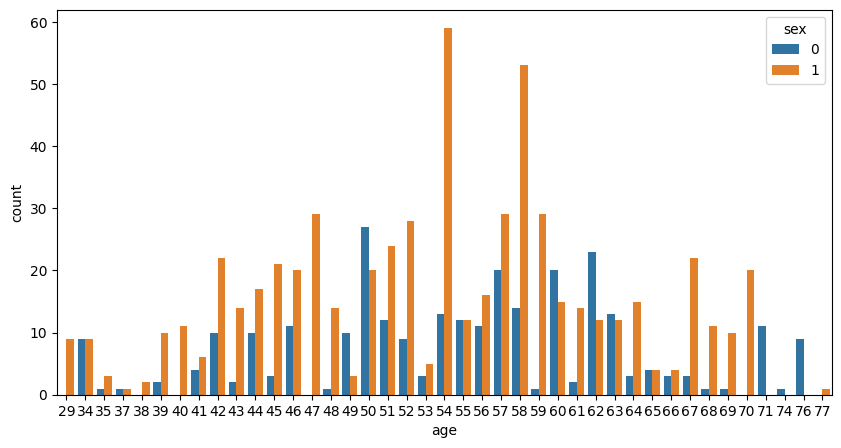

In [323]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='age', hue='sex')
plt.show()

## Data Analysis

In [324]:
# Check class distribution in the target variable
df['target'].value_counts(normalize=True)

target
1    0.564334
0    0.435666
Name: proportion, dtype: float64

In [325]:
# Data analysis
# Todo: analyze your data here
df.isnull().sum() # Check for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [326]:
df.shape # Check the shape of the dataframe

(886, 14)

In [327]:
df.dtypes # Check data types

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [328]:
df.describe() # Get summary statistics

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,54.007901,0.683973,1.005643,132.117381,247.497743,0.168172,0.495485,149.492099,0.310384,1.083296,1.424379,0.714447,2.278781,0.564334
std,9.126292,0.465186,1.024542,16.807511,47.209995,0.374230,0.526669,23.921327,0.462912,1.147935,0.556861,1.028825,0.572576,0.496124
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,245.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,206.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [329]:
df.duplicated().sum() # Check for duplicates

np.int64(0)

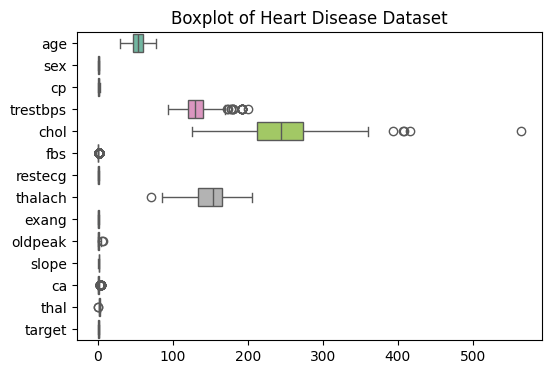

In [330]:
# Boxplot outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot of Heart Disease Dataset")
plt.show()

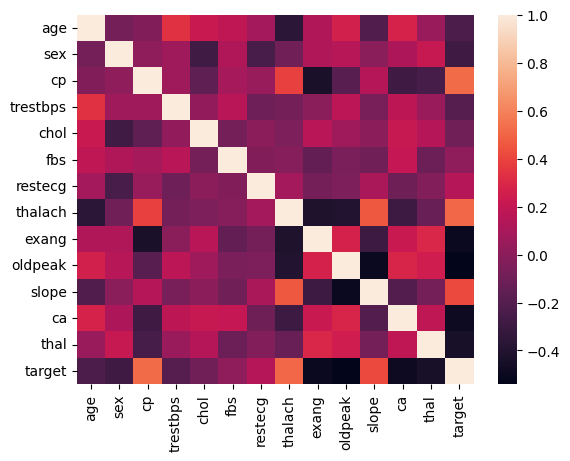

In [331]:
# Draw a heatmap to visualize correlations
sns.heatmap(df.corr())
plt.show()

## Preprocessing

In [332]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    # Remove outliers 2 cột trestbps, chol do có nhiều outliers 
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    condition = ~((df[['trestbps', 'chol']] < lower_bound[['trestbps', 'chol']]) | 
                  (df[['trestbps', 'chol']] > upper_bound[['trestbps', 'chol']])).any(axis=1)
    df = df[condition]
    
    return df

In [333]:
df = preprocessing_data(df.copy())

## Feature Engineering

<Axes: >

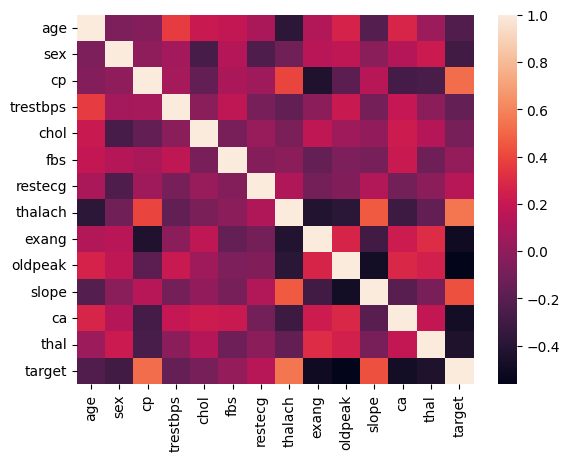

In [334]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df = df.copy()
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    target = df['target']
    numeric_cols = df.select_dtypes(include='number').columns.drop('target')
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    # Gán lại target không bị biến đổi
    df['target'] = target

    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [335]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(columns=['target'], inplace=False).values  # Select all columns except the target column
    y = df['target']  # Select the target column
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [336]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 10
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000))
    # Todo: fit your model with X, y
    model.fit(X, y)

    return model

def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """

    print(classification_report(y_true, y_pred))
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred))
    print("recall", recall_score(y_true, y_pred))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred))
    print("ROC_AUC: ", roc_auc_score(y_true, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = recall_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)

In [338]:
calculate_performance(testY, pred)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       112
           1       0.96      0.99      0.98       148

    accuracy                           0.97       260
   macro avg       0.98      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260

precision 0.9607843137254902
recall 0.9932432432432432
accuracy 0.9730769230769231
F1 0.9767441860465116
ROC_AUC:  0.9698359073359073
Confusion Matrix:  [[106   6]
 [  1 147]]


0.9932432432432432

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return  "7. " \
            "Other conclusion: "\
            "Mô hình Logistic Regression kết hợp với StandardScaler cho kết quả tốt với dữ liệu chuẩn hóa, \
            giúp phân loại nguy cơ mắc bệnh tim một cách hiệu quả. " \
            "Các chỉ số như Accuracy và F1-score đều ở mức cao, cho thấy mô hình cân bằng tốt giữa precision và recall. " \
            "Việc chọn đúng scaler và không làm biến đổi cột target là rất quan trọng để đảm bảo mô hình học chính xác. " \
            "Trong thực tế, mô hình này có thể hỗ trợ bác sĩ trong việc sàng lọc nhanh nguy cơ bệnh tim từ các chỉ số sức khỏe đầu vào. "\
            "Chọn tham số penalty = 'l2' sẽ giúp giảm được khả năng bị overfitting nhưng vẫn giữ nguyên được các feature. "\
            "Chọn tham số solver = 'lbfgs' phù hợp với dữ liệu lớn và có thể tính toán nhanh cho các tham số. "\